In [109]:
import pandas as pd
from sklearn import tree, preprocessing, model_selection, ensemble, feature_selection
import os
titanic_train = pd.read_csv('/Users/bharath/Downloads/titanic/train.csv')
titanic_train.info()
titanic_test = pd.read_csv('/Users/bharath/Downloads/titanic/test.csv')
titanic_test.info()

mean_imputer = preprocessing.Imputer()
mean_imputer.fit(titanic_train[['Age','Fare']])
titanic_test['Survived'] = None
titanic = pd.concat([titanic_train, titanic_test])

titanic[['Age','Fare']] = mean_imputer.transform(titanic[['Age','Fare']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [70]:
def split_title(name):
    return name.split(',')[1].split('.')[0].strip()

titanic['Title'] = titanic['Name'].map(split_title)


In [71]:
def Age_group(age):
    if (age >=0 and age <=10):
        return 'Child'
    elif (age >10 and age <= 25):
          return 'Young'
    elif (age >25 and age <= 50):
          return 'Middle'
    else:
        return 'Old'    

In [72]:
titanic['Age1'] = titanic['Age'].map(Age_group)

In [73]:
titanic['FamilySize'] = titanic['Parch'] + titanic['SibSp'] + 1

In [74]:
def family_size(size):
    if (size ==1):
        return 'Single'
    elif (size >1 and size <= 3):
          return 'Small'
    elif (size >3 and size <=6):
          return 'Medium'
    else:
        return 'large'

In [75]:
    titanic['Family_type'] = titanic['FamilySize'].map(family_size)

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null object
Ticket         1309 non-null object
Title          1309 non-null object
Age1           1309 non-null object
FamilySize     1309 non-null int64
Family_type    1309 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 173.9+ KB


In [77]:
titanic1 = pd.get_dummies(titanic, columns=['Pclass','Sex','Embarked','Age1','Family_type','Title'])

In [78]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 44 columns):
Age                   1309 non-null float64
Cabin                 295 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
SibSp                 1309 non-null int64
Survived              891 non-null object
Ticket                1309 non-null object
FamilySize            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Age1_Child            1309 non-null uint8
Age1_Middle           1309 non-null uint8
Age1_Old              1309 non-null uint8
Age1_Y

In [90]:
titanic2 = titanic1.drop(['Age','Cabin','Name','PassengerId','Ticket','Survived'],1) 
# why 'Parch','SibSp' are not dropped ?
x_train = titanic2[0:titanic_train.shape[0]]
y_train = titanic_train['Survived']

dt_rand = ensemble.RandomForestClassifier(n_estimators=5)
dt_rand.fit(x_train,y_train)

(418, 19)

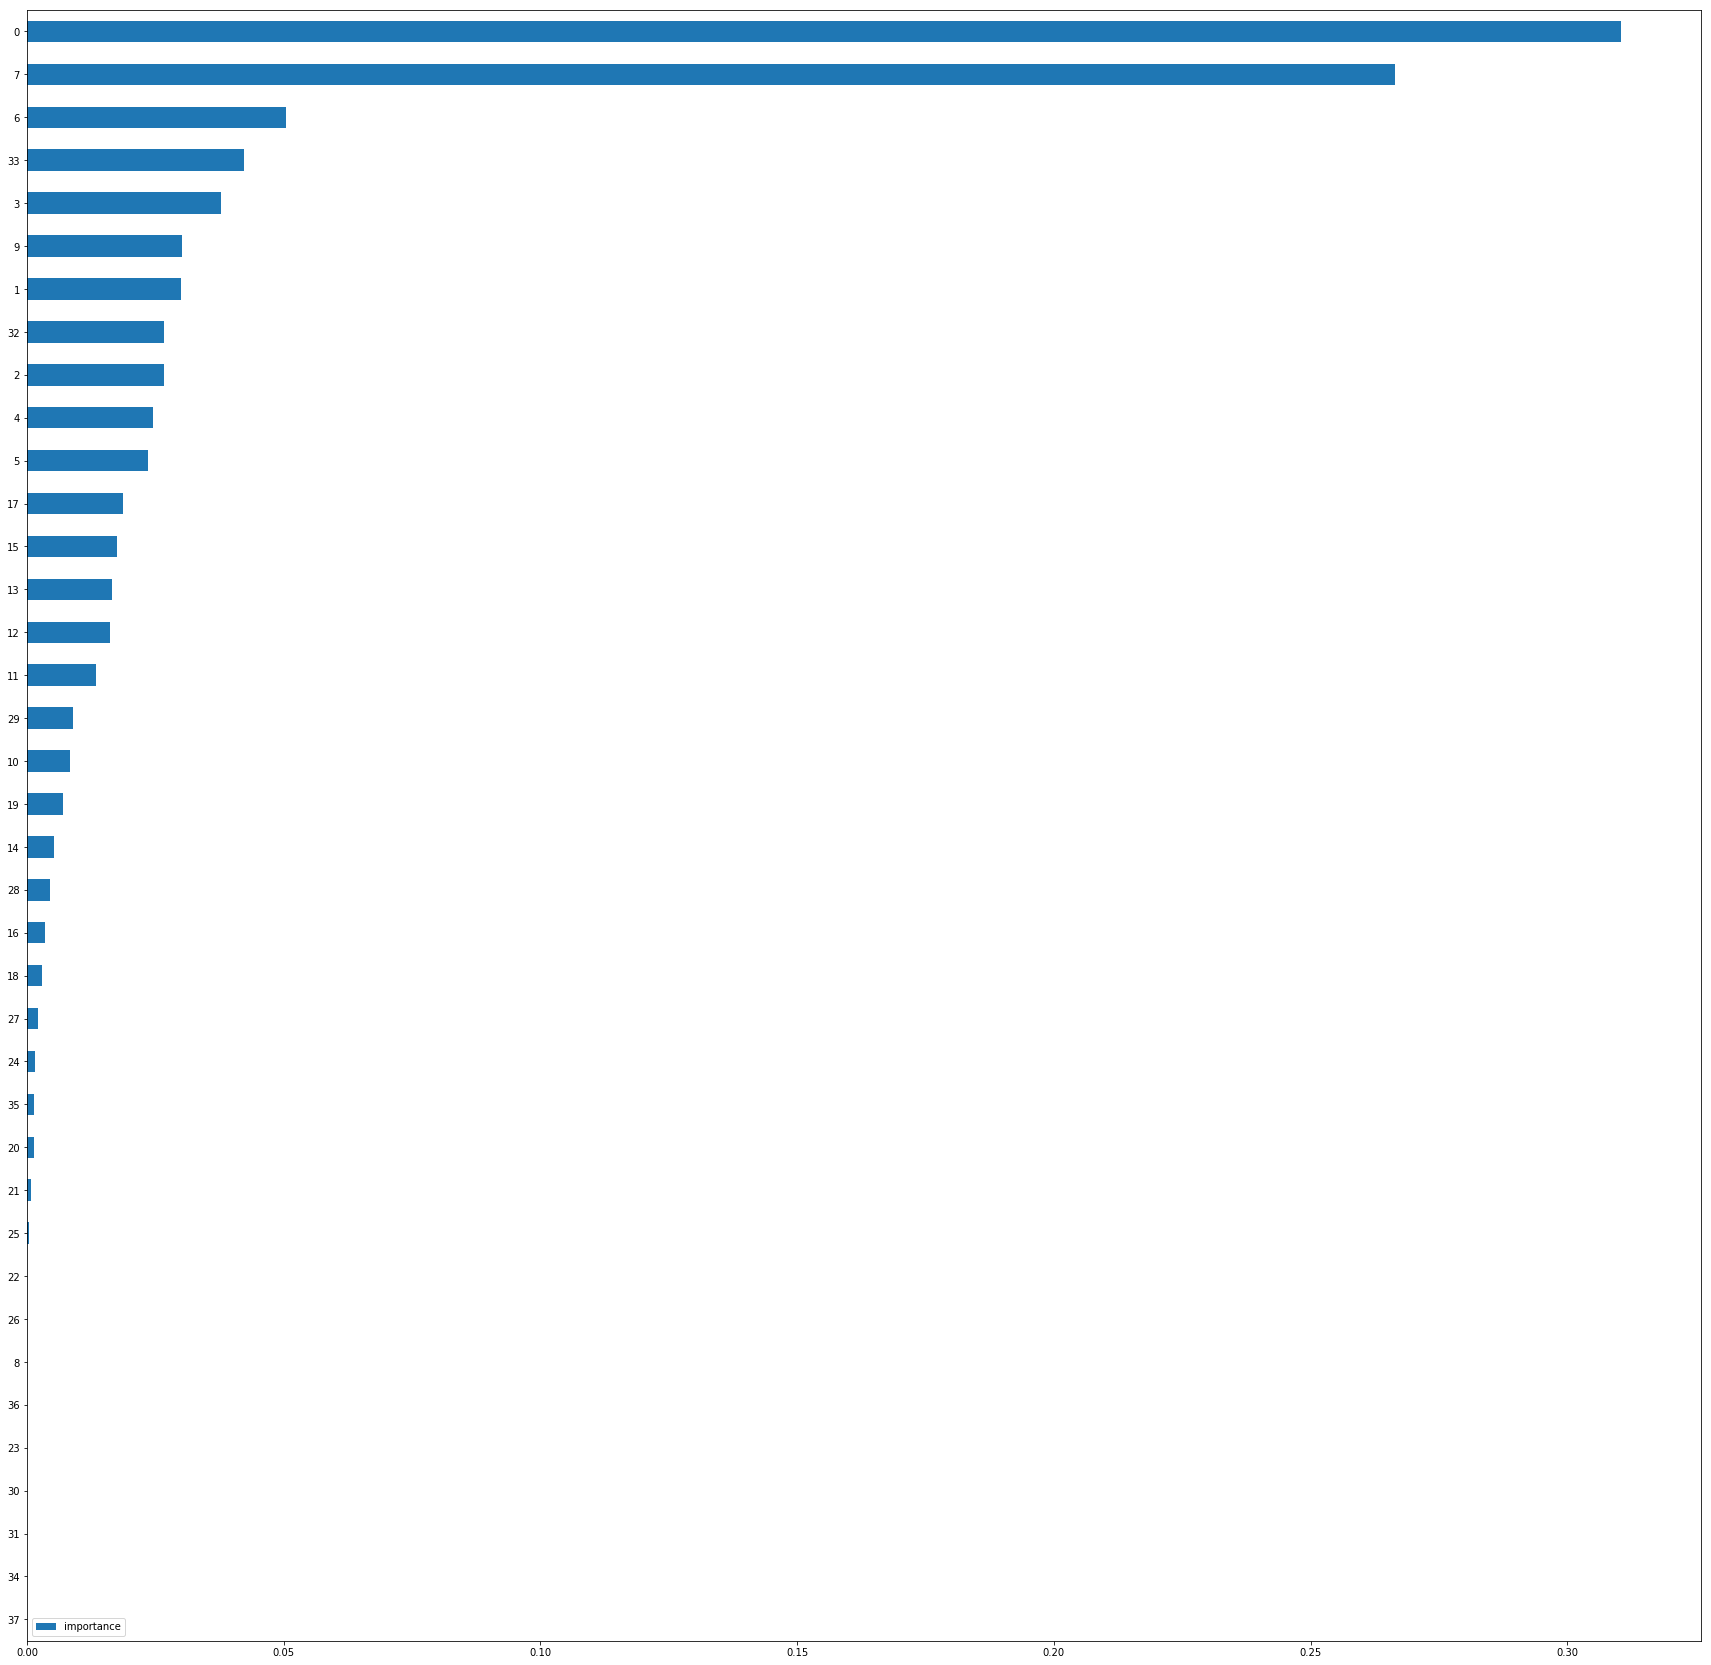

In [141]:
features = pd.DataFrame({'feature':x_train.columns, 'importance': dt_rand.feature_importances_ })
features.sort_values(by=['importance'],ascending=True, inplace=True)
#features.set_index('feature', inplace=True)
features.plot(kind='barh',figsize=(30,30))
x_train.shape
fs = feature_selection.SelectFromModel(dt_rand, threshold='median', prefit=True)
x_train1 = fs.transform(x_train)
x_train1.shape

x_test = titanic2[titanic_train.shape[0]:]
x_test1 = fs.transform(x_test)
x_test1.shape

(891, 38)

In [126]:
Random_estimator = ensemble.RandomForestClassifier(random_state=100, oob_score=True)
random_grid = {'n_estimators': list(range(10,21,10))}

In [127]:
random_grid_fi = model_selection.GridSearchCV(Random_estimator, random_grid, cv=10, n_jobs=5 )

In [128]:
random_grid_fi.fit(x_train1, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=True, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_estimators': [10, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [130]:
random_grid_fi.best_score_

0.8047138047138047

In [132]:
random_grid_fi.score(x_train1, y_train)

0.9427609427609428

(891, 12)

In [143]:
titanic_test['Survived'] = random_grid_fi.predict(x_test1)

In [144]:
os.chdir('/Users/bharath/Downloads/titanic')

In [145]:
titanic_test.to_csv('M4 with RF+FeatureImportance.csv', columns= ['PassengerId', 'Survived'], index=False)

In [97]:
os.curdir

'.'